# Cluster Analysis of Pokemon Dataset

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
df = pd.read_csv('Data/Pokemon.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## K-Means Clustering

In [8]:
# Droping non-numberical columns
pokemon = df.drop(columns = ['Type 1', 'Type 2', 'Legendary'])
print(pokemon.shape)
pokemon.head()

(151, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
Name,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1
Ivysaur,405,60,62,63,80,80,60,2
Venusaur,525,80,82,83,100,100,80,3
Charmander,309,39,52,43,60,50,65,1
Charmeleon,405,58,64,58,80,65,80,2


In [9]:
# Setting up K-mean model and training the model
km = KMeans(n_clusters=2)
km.fit(pokemon)

KMeans(n_clusters=2)

To find out what the members of each cluster are I generated a set of cluster labels using `km.predict()` on the original data and added this to the data frame.  Now, to explore the difference between each cluster:
 
 * I found the mean value for each column by cluster. I did this by selecting the rows for each cluster and then taking the mean or by using the `groupby` method
 * Identified two columns that seem to be more distinct between clusters, used these to plot the data with different colours for each cluster to visualise the result of clustering.

In [10]:
# adding predicted cluster label as one more column into the dataset
pokemon['label'] = km.predict(pokemon)
print(pokemon.shape)
pokemon.head()

(151, 9)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,label
Name,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1,0
Ivysaur,405,60,62,63,80,80,60,2,1
Venusaur,525,80,82,83,100,100,80,3,1
Charmander,309,39,52,43,60,50,65,1,0
Charmeleon,405,58,64,58,80,65,80,2,1


In [11]:
# using groupby to first group the rows in terms of cluster label and then calculate the mean of each column
pokeman_mean = pokemon.groupby(['label']).agg('mean')
pokeman_mean

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
label,,,,,,,,
0,313.652174,48.652174,55.985507,56.898551,50.000000,48.246377,53.869565,1.188406
1,485.695122,77.304878,86.487805,77.756098,81.560976,80.975610,81.609756,1.914634


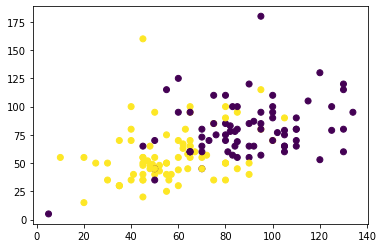

In [12]:
plt.scatter(pokemon['Attack'], pokemon['Defense'], c=pokemon['label'])

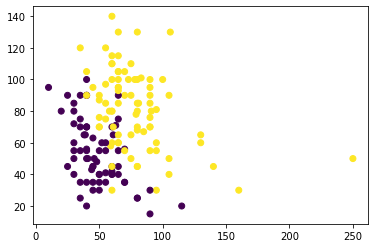

In [12]:
# Identifying two columns that seem to be more distinct between clusters
# Using these to plot the data with different colours for wach cluster to visualise the result of clustering
plt.scatter(pokemon['HP'], pokemon['Speed'], c=pokemon['label'])

# Hierarchical Clustering

In [14]:
# Calculating the pairwise distance using pdist
dist = pdist(pokemon, 'euclidean') #pdist return a 1-D matrix which contain the upper triangle of the pairwise distance matrix
print(pokemon.shape)
print(151*151/2-151/2)
print(dist.shape)
print(pokemon.shape)
linkage_matrix = linkage(dist, method = 'complete')
print (linkage_matrix.shape)
linkage_matrix[0:2,]

(151, 9)
11325.0
(11325,)
(151, 9)
(150, 4)


array([[ 43.        , 136.        ,   7.14142843,   2.        ],
       [  9.        ,  12.        ,  10.        ,   2.        ]])

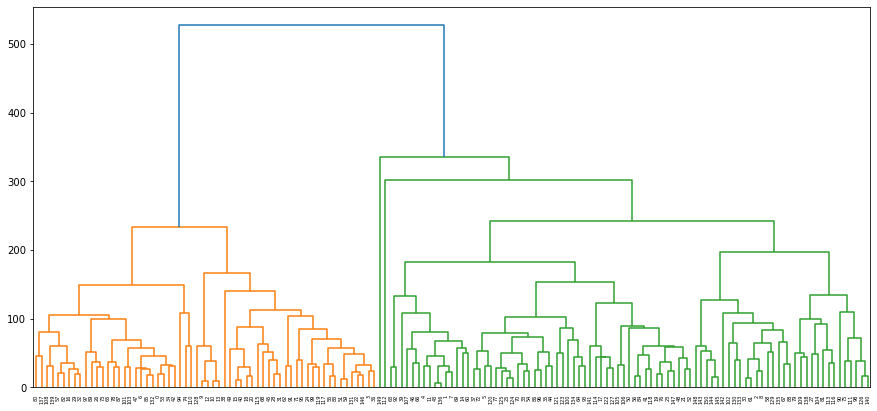

In [15]:
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

In [16]:
# predicting the clusters label for each row and adding it to as one more culumn in the data
labels = cut_tree(linkage_matrix, n_clusters=3)
pokemon['label'] = labels
pokemon

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,label
Name,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1,0
Ivysaur,405,60,62,63,80,80,60,2,1
Venusaur,525,80,82,83,100,100,80,3,1
Charmander,309,39,52,43,60,50,65,1,0
Charmeleon,405,58,64,58,80,65,80,2,1
...,...,...,...,...,...,...,...,...,...
Dratini,300,41,64,45,50,50,50,1,0
Dragonair,420,61,84,65,70,70,70,2,1
Dragonite,600,91,134,95,100,100,80,3,1


In [17]:
pokemon[pokemon['label']==0]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,label
Name,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1,0
Charmander,309,39,52,43,60,50,65,1,0
Squirtle,314,44,48,65,50,64,43,1,0
Caterpie,195,45,30,35,20,20,45,1,0
Metapod,205,50,20,55,25,25,30,2,0
...,...,...,...,...,...,...,...,...,...
Ditto,288,48,48,48,48,48,48,1,0
Eevee,325,55,55,50,45,65,55,1,0
Omanyte,355,35,40,100,90,55,35,1,0
